In [2]:
import numpy as np
import pandas as pd
import os

#processing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import *
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.preprocessing import LabelEncoder

#build model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#data Viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = 'plotly'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juniarta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
dataset = pd.read_csv('../Cleaning/Clean_Dataset.csv')

In [4]:
df = dataset[['Clean_Text', 'Stop_Words_Text', 'Stemmed_Text','Location','indonlp_sentiment']]

In [5]:
df.head()

Clean_Text  \
0  cina dan as terus bersaing mengembangkan tekno...   
1  katanya mau metaverse tapi down melulu bagaima...   
2  mungkin facebook sudah berencana menjadi metav...   
3  bersaing dengan perusahaan kelas dunia untuk m...   
4  metaverse belum diadaptasi masif masih terus d...   

                                     Stop_Words_Text  \
0  cina as bersaing mengembangkan teknologi terba...   
1             katanya metaverse down melulu mas zuck   
2  mungkin facebook berencana metaverse menyiapka...   
3  bersaing perusahaan kelas dunia mencapai sekto...   
4  metaverse diadaptasi masif dikembangkan kadang...   

                                        Stemmed_Text  \
0  cina as saing kembang teknologi baru usaha neg...   
1                kata metaverse down melulu mas zuck   
2  mungkin facebook rencana metaverse siap diem s...   
3  saing usaha kelas dunia capai sektor publik sw...   
4  metaverse adaptasi masif kembang kadang bingun...   

                      Location indonlp_sentiment  
0                      Jakarta           neutral  
1  Kalimantan Barat, Indonesia          negative  
2                   Indonesia           positive  
3                    Indonesia           neutral  
4                   Yogyakarta          negative

In [6]:
#check for missing data
df.isnull().sum()

Clean_Text               0
Stop_Words_Text          0
Stemmed_Text             0
Location             25786
indonlp_sentiment        0
dtype: int64

In [7]:
df['indonlp_sentiment'] = df['indonlp_sentiment'].map({'negative':'Negative','neutral':'Neutral','positive':'Positive'})

C:\Users\Juniarta\AppData\Local\Temp\ipykernel_6364\985620627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['indonlp_sentiment'] = df['indonlp_sentiment'].map({'negative':'Negative','neutral':'Neutral','positive':'Positive'})


In [8]:
df.head()

Clean_Text  \
0  cina dan as terus bersaing mengembangkan tekno...   
1  katanya mau metaverse tapi down melulu bagaima...   
2  mungkin facebook sudah berencana menjadi metav...   
3  bersaing dengan perusahaan kelas dunia untuk m...   
4  metaverse belum diadaptasi masif masih terus d...   

                                     Stop_Words_Text  \
0  cina as bersaing mengembangkan teknologi terba...   
1             katanya metaverse down melulu mas zuck   
2  mungkin facebook berencana metaverse menyiapka...   
3  bersaing perusahaan kelas dunia mencapai sekto...   
4  metaverse diadaptasi masif dikembangkan kadang...   

                                        Stemmed_Text  \
0  cina as saing kembang teknologi baru usaha neg...   
1                kata metaverse down melulu mas zuck   
2  mungkin facebook rencana metaverse siap diem s...   
3  saing usaha kelas dunia capai sektor publik sw...   
4  metaverse adaptasi masif kembang kadang bingun...   

                      Location indonlp_sentiment  
0                      Jakarta           Neutral  
1  Kalimantan Barat, Indonesia          Negative  
2                   Indonesia           Positive  
3                    Indonesia           Neutral  
4                   Yogyakarta          Negative

#### EDA (Exploratory Data Analysis

In [9]:
#The distribution of Sentiments
df.groupby('indonlp_sentiment').count().plot(kind='bar')

###### Plotting the Distribution of Tweet Lengths

In [9]:
#Calculate Tweet Lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in df['Clean_Text']])

#The Distribution of Tweet Text Lengths
tweet_len.plot(kind='box')

###### Plotting the distribution of text length for Positive Sentiment Tweets

C:\Users\Juniarta\AppData\Local\Temp\ipykernel_11012\948949701.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



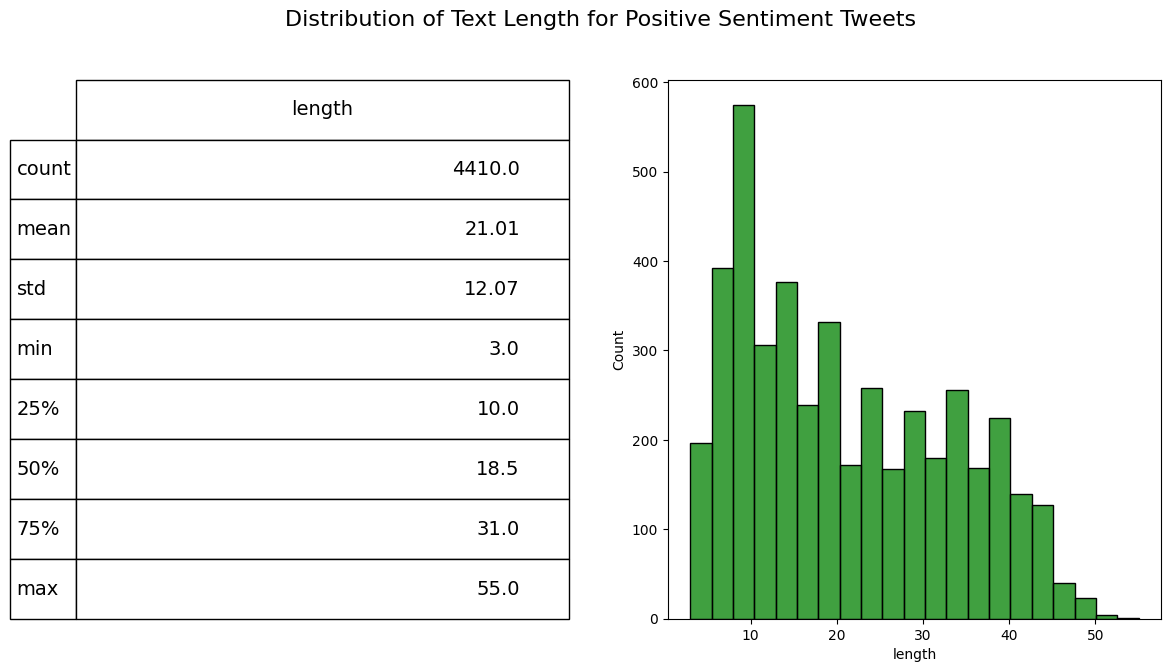

In [10]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Clean_Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['indonlp_sentiment']=='Positive']['length'], ax=ax1, color='green' )
describe = df.length[df.indonlp_sentiment=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox,
                 colLabels = describe.columns)
table.set_fontsize(font_size)
fig.suptitle("Distribution of Text Length for Positive Sentiment Tweets", fontsize= 16)

plt.show()

C:\Users\Juniarta\AppData\Local\Temp\ipykernel_11012\3787875777.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



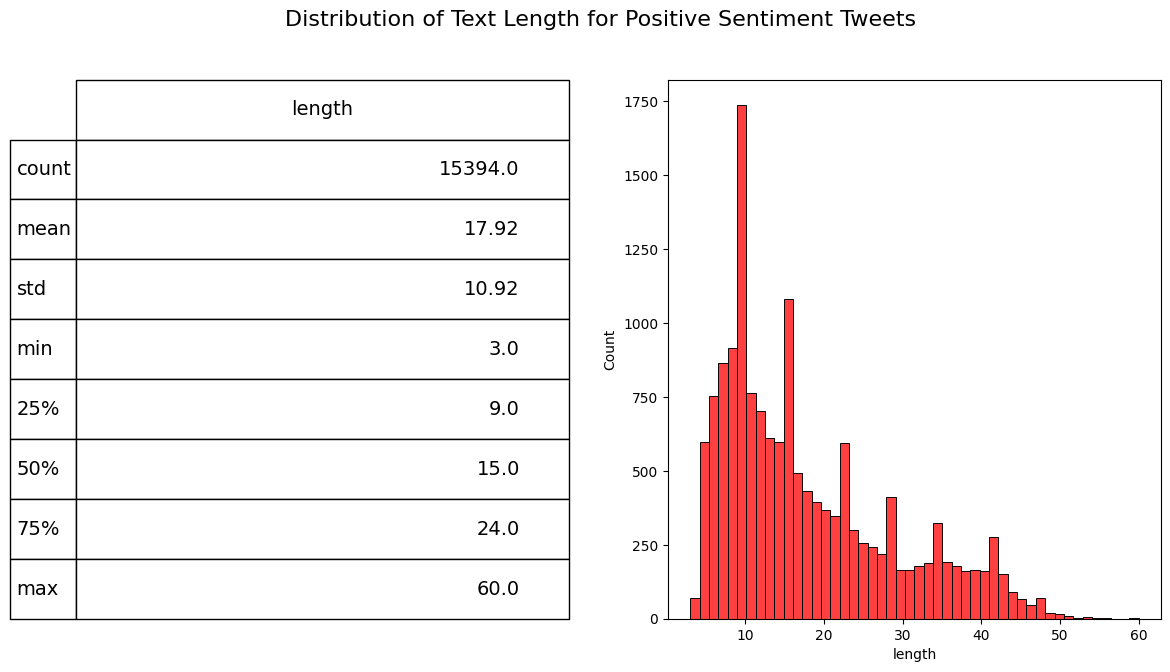

In [11]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Clean_Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['indonlp_sentiment']=='Negative']['length'], ax=ax1, color='red' )
describe = df.length[df.indonlp_sentiment=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox,
                 colLabels = describe.columns)
table.set_fontsize(font_size)
fig.suptitle("Distribution of Text Length for Positive Sentiment Tweets", fontsize= 16)

plt.show()

###### Plotting the Pie Chart of the Percentage of different Sentiments of all tweets

In [12]:
import plotly.express as px
fig = px.pie(df, names = 'indonlp_sentiment', title = 'Pie Chart of Different Sentiment')
fig.show()

In [13]:
df.drop(['length'],axis=1, inplace=True)
df.head()

C:\Users\Juniarta\AppData\Local\Temp\ipykernel_11012\3787922307.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Clean_Text  \
0  cina dan as terus bersaing mengembangkan tekno...   
1  katanya mau metaverse tapi down melulu bagaima...   
2  mungkin facebook sudah berencana menjadi metav...   
3  bersaing dengan perusahaan kelas dunia untuk m...   
4  metaverse belum diadaptasi masif masih terus d...   

                                     Stop_Words_Text  \
0  cina as bersaing mengembangkan teknologi terba...   
1             katanya metaverse down melulu mas zuck   
2  mungkin facebook berencana metaverse menyiapka...   
3  bersaing perusahaan kelas dunia mencapai sekto...   
4  metaverse diadaptasi masif dikembangkan kadang...   

                                        Stemmed_Text  \
0  cina as saing kembang teknologi baru usaha neg...   
1                kata metaverse down melulu mas zuck   
2  mungkin facebook rencana metaverse siap diem s...   
3  saing usaha kelas dunia capai sektor publik sw...   
4  metaverse adaptasi masif kembang kadang bingun...   

                      Location indonlp_sentiment  
0                      Jakarta           Neutral  
1  Kalimantan Barat, Indonesia          Negative  
2                   Indonesia           Positive  
3                    Indonesia           Neutral  
4                   Yogyakarta          Negative

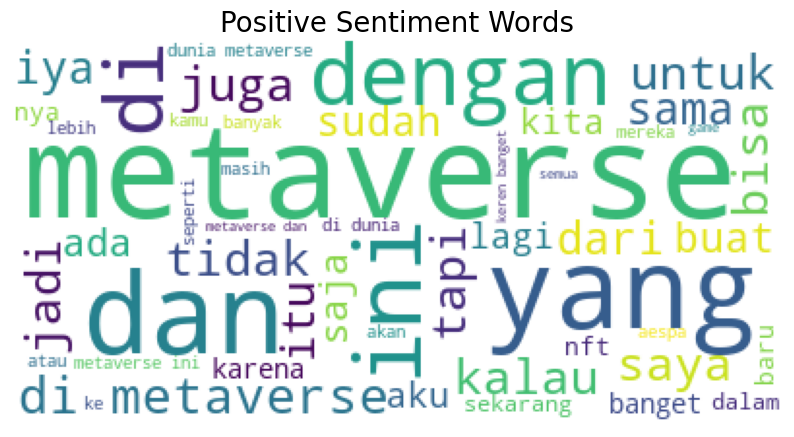

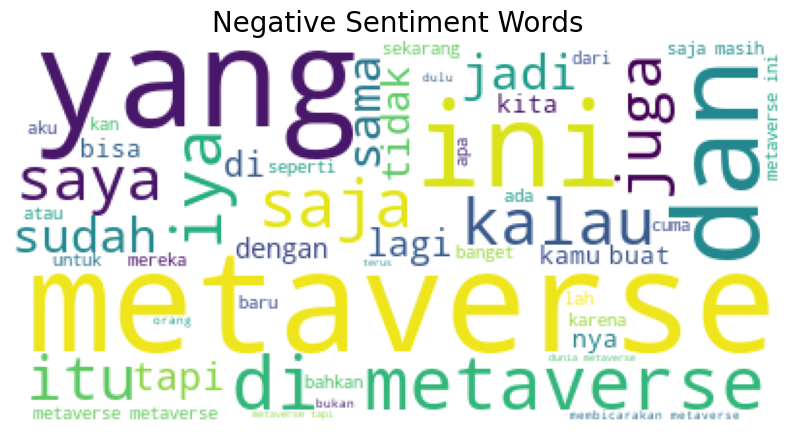

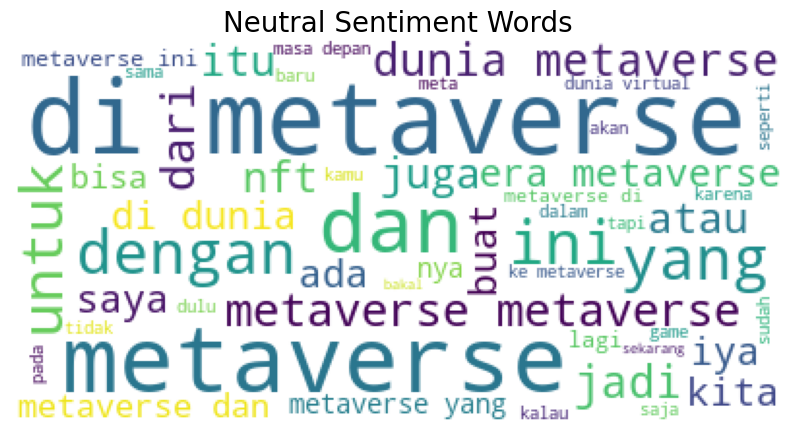

In [14]:
# Visualizing data into Wordclouds

from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, indonlp_sentiment):
    combined_tweets = " ".join([tweet for tweet in df[df.indonlp_sentiment==indonlp_sentiment]['Clean_Text']])
    
     # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(indonlp_sentiment), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(df, 'Positive')
     
# Negative tweet words
wordcount_gen(df, 'Negative')
     
# Neutral tweet words
wordcount_gen(df, 'Neutral')

#### Data Preprocessing

In [15]:
#create Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [10]:
def tweet_to_words(tweet):
    text = tweet
    #tokenize
    words = text.split()
    
    #stemming
    #words = [stemmer.stem(w) for w in words]
    return words

print("\nOriginal tweet ->", df['Clean_Text'][0])
print('\nProcessed tweet ->', tweet_to_words(df['Clean_Text'][0]))


Original tweet -> cina dan as terus bersaing mengembangkan teknologi terbaru termasuk kali ini perusahaan di kedua negara berlomba lomba membangun dunia virtual atau metaverse

Processed tweet -> ['cina', 'dan', 'as', 'terus', 'bersaing', 'mengembangkan', 'teknologi', 'terbaru', 'termasuk', 'kali', 'ini', 'perusahaan', 'di', 'kedua', 'negara', 'berlomba', 'lomba', 'membangun', 'dunia', 'virtual', 'atau', 'metaverse']


In [11]:
#X = df['Clean_Text'].apply(lambda x:tweet_to_words(x))
X = df['Stemmed_Text'].apply(lambda x:tweet_to_words(x))

In [12]:
#encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['indonlp_sentiment'])

In [20]:
Y

array([1, 0, 2, ..., 1, 1, 0])

In [13]:
print(X[0])
print(Y[0])

['cina', 'as', 'saing', 'kembang', 'teknologi', 'baru', 'usaha', 'negara', 'lomba', 'lomba', 'bangun', 'dunia', 'virtual', 'metaverse']
1


In [15]:
Y

array([1, 0, 2, ..., 1, 1, 0])

##### Train and Test Split

In [16]:
y = pd.get_dummies(df['indonlp_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [18]:
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (25441,) (25441,)
Validation Set -> (8481,) (8481,)
Test Set -> (8481,) (8481,)


##### Bag of Words (BOW) feature extraction

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction-text import TfidVectorizer

vocabulary_size = 5000 

#Tweets have already been preprocessed hence dummy function will be passed in
#to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='indonesian')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

C:\Users\Juniarta\anaconda3\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



##### Tokenizing & Padding

In [23]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequence(text):

    #text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    #transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    #pad sequence to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    #return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['Clean_Text'][0])
X, tokenizer = tokenize_pad_sequence(df['Clean_Text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 cina dan as terus bersaing mengembangkan teknologi terbaru termasuk kali ini perusahaan di kedua negara berlomba lomba membangun dunia virtual atau metaverse
After Tokenization & Padding 
 [2835    4  698   81 1560  493   36  557  361  156    6  103    2 1130
   91 1499 1166  280    9   30   44    1    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


##### Saving Tokenized Data

In [24]:
import pickle

#saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    #loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [25]:
import keras.backend as K

def f1_score(precision, recall):
    '''Function to calculate f1 score'''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

##### Train and Test Split

In [26]:
y = pd.get_dummies(df['indonlp_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (25532, 50) (25532, 3)
Validation Set -> (8511, 50) (8511, 3)
Test Set -> (8511, 50) (8511, 3)


##### Bidirectional LSTM Using NN

In [27]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses


In [28]:
'''
# Hyperparameter tuning (to know the best hyperparameter for this model)

# Wrapper model with default hyperparameter values
model = KerasClassifier(build_fn = create_model, epochs = 25, batch_size=128) 

# Hyperparameters
embed_dim = [32, 64]
hidden_unit = [16, 32, 64]
dropout_rate = [0.2]
optimizers = [Adam, RMSprop]
learning_rate = [0.01, 0.001, 0.0001]
epochs = [10, 25]
batch_size = [128, 256]
param_grid = dict(embed_dim = embed_dim, hidden_unit = hidden_unit, dropout_rate = dropout_rate, 
                  learning_rate = learning_rate, optimizers = optimizers, epochs = epochs, batch_size = batch_size)

# Evaluation model with GridSearchCV to know what the best hyperparameter for model 
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)
grid_result = grid.fit(X_train, y_train)

results = pd.DataFrame()
results['means'] = grid_result.cv_results_['mean_test_score']
results['stds'] = grid_result.cv_results_['std_test_score']
results['params'] = grid_result.cv_results_['params']
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
results.to_csv(r'gridsearchcv_results.csv', index = False, header = True)
results.sort_values(by='means', ascending = False).reset_index(drop=True)
'''

'\n# Hyperparameter tuning (to know the best hyperparameter for this model)\n\n# Wrapper model with default hyperparameter values\nmodel = KerasClassifier(build_fn = create_model, epochs = 25, batch_size=128) \n\n# Hyperparameters\nembed_dim = [32, 64]\nhidden_unit = [16, 32, 64]\ndropout_rate = [0.2]\noptimizers = [Adam, RMSprop]\nlearning_rate = [0.01, 0.001, 0.0001]\nepochs = [10, 25]\nbatch_size = [128, 256]\nparam_grid = dict(embed_dim = embed_dim, hidden_unit = hidden_unit, dropout_rate = dropout_rate, \n                  learning_rate = learning_rate, optimizers = optimizers, epochs = epochs, batch_size = batch_size)\n\n# Evaluation model with GridSearchCV to know what the best hyperparameter for model \ngrid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)\ngrid_result = grid.fit(X_train, y_train)\n\nresults = pd.DataFrame()\nresults[\'means\'] = grid_result.cv_results_[\'mean_test_score\']\nresults[\'stds\'] = grid_result.cv_results_[\'std_test_score\']\nresu

In [29]:

vocab_size = 5000
embedding_size = 32
epochs = 20
learning_rate = 0.1 #0.1
decay_rate = learning_rate/epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# build model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

C:\Users\Juniarta\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [30]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [31]:
print(model.summary())

#compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
              metrics=['accuracy',Precision(), Recall()])

#train model
batch_size = 64
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

##### Model Accuracy & Loss

In [32]:
#Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
#print metrics
print('')
print('Accuracy : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall : {:.4f}'.format(recall))
print('F1 Score : {:.4f}'.format(f1_score(precision,recall)))


Accuracy : 0.7689
Precision : 0.7825
Recall : 0.7457
F1 Score : 0.7637


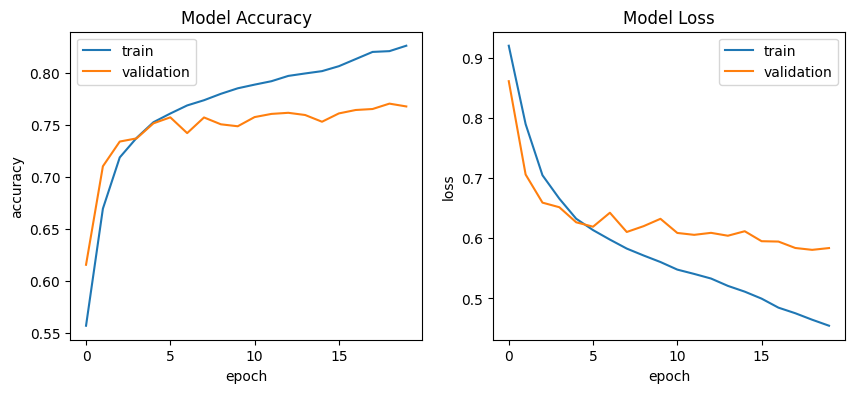

In [33]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    #first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    #second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

##### Model Confusion Matrix

266/266 [==============================] - 2s 5ms/step


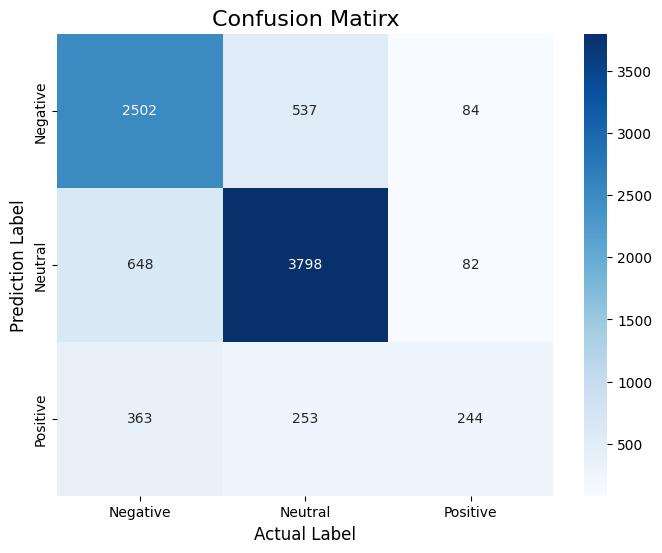

In [34]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    #use model to do the prediction
    y_pred = model.predict(X_test)
    #compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1),
                          np.argmax(y_pred, axis=1))
    #plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,cmap = plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion Matirx', fontsize=16)
    plt.xlabel('Actual Label', fontsize=12)
    plt.ylabel('Prediction Label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

##### Model Save and Load for the Prediction

In [35]:
#save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

Best model saved


In [36]:
from keras.models import load_model

#load model
model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    sentiment_classes = ['Negative','Neutral','Positive']
    max_len=50
    
    #transform text to sequence of integers using tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    #pad sequence to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    #perform the prediction using loaded model
    yt = model.predict(xt).argmax(axis=1)
    #print predicted sentiment
    print('Predicted sentiment is', sentiment_classes[yt[0]])

In [37]:
predict_class(['sama sama semoga selalu terhindar dari usaha tipu menipu di metaverse iya'])

1/1 [==============================] - 1s 871ms/step
Predicted sentiment is Negative


In [38]:
predict_class(['teknologi yang sangat manjanjikan, semoga dapat diterapkan secara masif'])

1/1 [==============================] - 0s 28ms/step
Predicted sentiment is Negative


In [39]:
from nltk.tokenize import word_tokenize
word_dict = {}
sentence = "halo teman-teman semuanya"
word_token = word_tokenize(sentence)
for j in word_token:
    if j not in word_dict:
        word_dict[j] = 1
    else:
        word_dict[j] += 1

In [40]:
word_dict

{'halo': 1, 'teman-teman': 1, 'semuanya': 1}